# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **None, None, Poland**, or **Poland** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **None, None, Poland** to Ann Arbor, USA. In that case at least one source file must be about **None, None, Poland**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **None, None, Poland** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

---

# 1. Region and Domain

<br>
In this notebook I would like to focus on <b>Poland</b> and its two biggest airports - <b>Balice Airport</b> near Kraków and <b>Warsaw Chopin Airport</b>. My domain will be airtrafic and airports growth.
<br>
<br>

# 2. Research Question

<br>
How much both airports have grown over the years and which one is growing relatively faster? Here, I would like to take under consideration the total number of passangers served and its change year-to-year.
<br>
<br>

# 3. Links

---

[Balice Airport](https://en.wikipedia.org/wiki/Krak%C3%B3w_John_Paul_II_International_Airport )

[Warsaw Chopin Airport](https://en.wikipedia.org/wiki/Warsaw_Chopin_Airport)

---

Data has been taken from above Wikipedia pages and I put it into Excel file with two spreadsheets, which can be accessed on my GitHub page. It is also uploaded to Jupyter Notebook's directory, therefore there is no url link in pandas read_excel function.

[Dataset](https://github.com/kosek-g/Applied_DS_University_of_Michigan/tree/main/Course_2_Plotting/Final_assignment)

---

# 4. Data Preparation

In [143]:
# Imports

import pandas as pd
import numpy as np

In [144]:
# load data

df_b = pd.read_excel('airports_balice.xlsx') #DataFrame for Balice Airport
df_w = pd.read_excel('airports_warszawa.xlsx') #DataFrame for Warszawa Airport

Lets display few rows for both DataFrames

In [145]:
df_b.head()

,Year,Passenger Count
0,2003,593.214
1,2004,841.123
2,2005,"1,586,130"
3,2006,"2,367,257"
4,2007,"3,068,199"


In [146]:
df_w.head()

,Year,Passengers
0,2005,"7,071,881"
1,2006,"8,101,827"
2,2007,"9,268,476"
3,2008,"9,460,606"
4,2009,"8,320,927"


Firs of all, I need to get rid of commas in 'Passanger Count' columns and conver values to numbers (int64).

In [147]:
df_w = df_w.replace(to_replace=r'[.,]', value='', regex=True)
df_b = df_b.replace(to_replace=r'[.,]', value='', regex=True)

In [148]:
df_w = df_w.astype({'Passengers': 'int'})
df_b = df_b.astype({'Passenger Count': 'int'})

Because passengers count for Balice Airport starts with 2003 and for Warsaw's Airport from 2005. I'm going to remove first 2 rows and the one for 2021 year in order to keep the same shape and show consistence data. I will also change column name to just 'Passangers' as in df_w,

In [149]:
df_b = df_b.iloc[2:-1 , : ]
df_b = df_b.rename(columns={'Passenger Count': 'Passengers'})
df_b = df_b.reset_index()
df_b = df_b.drop('index', axis = 1)

The next step will be to add percentage change between the current and a prior element. Thanks to that. I will be able to see which airport has been growing faster.

In [150]:
df_b['percentage_change'] = df_b.Passengers.pct_change()*100
df_w['percentage_change'] = df_w.Passengers.pct_change()*100

In [151]:
# Round percentage values to 2 decimals

df_b = df_b.round(2)
df_w = df_w.round(2)

Let's display few rows for each DataFrames.

In [152]:
df_b.head()

,Year,Passengers,percentage_change
0,2005,1586130,NaN
1,2006,2367257,49.25
2,2007,3068199,29.61
3,2008,2923961,-4.70
4,2009,2680322,-8.33


In [153]:
df_w.head()

,Year,Passengers,percentage_change
0,2005,7071881,NaN
1,2006,8101827,14.56
2,2007,9268476,14.40
3,2008,9460606,2.07
4,2009,8320927,-12.05


Finaly, I will concatenate two DataFrames so we could visualize the data and create a running totals for perecentage change (this will help to visualize the growth).

In [154]:
dfs = pd.merge(df_b, df_w, left_index=True, right_index=True, how='outer')
dfs = dfs.rename(columns={'Year_x': 'Year', 'Passengers_x': 'Passengers_balice', 'percentage_change_x': 'percentage_change_b',
                          'Passengers_y': 'Passengers_warsaw', 'percentage_change_y': 'percentage_change_w'})

dfs = dfs.drop('Year_y', axis = 1)

In [155]:
dfs['run_total_b'] = dfs['percentage_change_b'].cumsum()
dfs['run_total_w'] = dfs['percentage_change_w'].cumsum()

In [156]:
dfs.head()

,Year,Passengers_balice,percentage_change_b,Passengers_warsaw,percentage_change_w,run_total_b,run_total_w
0,2005,1586130,NaN,7071881,NaN,NaN,NaN
1,2006,2367257,49.25,8101827,14.56,49.25,14.56
2,2007,3068199,29.61,9268476,14.40,78.86,28.96
3,2008,2923961,-4.70,9460606,2.07,74.16,31.03
4,2009,2680322,-8.33,8320927,-12.05,65.83,18.98


---
# 5. Data Visualization

<br>
In that section I will present few graphs and try to answer to the question asked at the beggining. 
<br><br>
Let's first display the total sum of passengers for both airports and see how big is the difference.

In [157]:
# Imports

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [158]:
# Creating 'melted' DataFrame in order to create bar chart in Seaborn

tidy_df = dfs[['Year', 'Passengers_balice', 'Passengers_warsaw']]
tidy = pd.melt(tidy_df, id_vars='Year').rename(columns=str.title)

<function matplotlib.pyplot.show(close=None, block=None)>

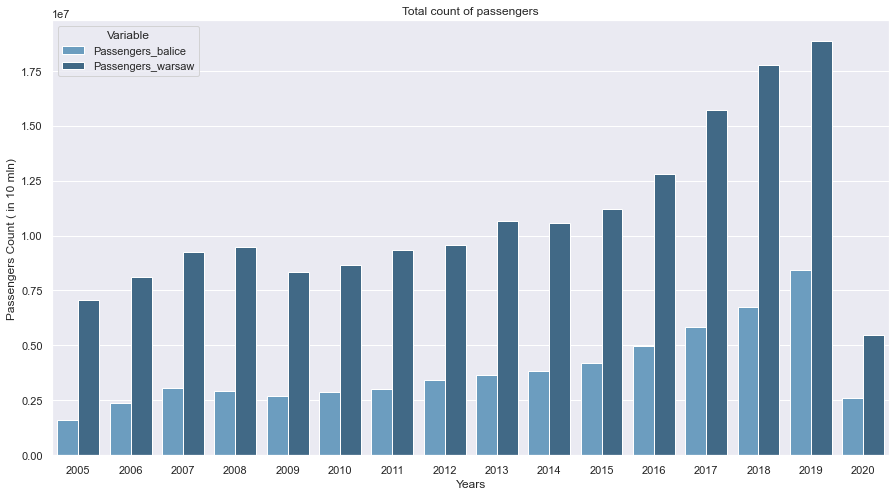

In [168]:
sns.set_theme()

fig_dims = (15, 8)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Year', y="Value", data=tidy, hue='Variable',
                 palette="Blues_d", ax=ax)
ax.set(xlabel = 'Years', ylabel = 'Passengers Count ( in 10 mln)', title = "Total count of passengers")
plt.show

It's very clear that Warsaw's Airport handles much more passengers than Balice. But let's check if it develops and grows better.
<br><br>
To do this I will create a line chart showing the percentage change of passengers number (running sum ) for both airports. This is a good growth indicator. 

In [160]:
# Creating 'melted' DataFrame in order to create line chart in Seaborn

tidy_df2 = dfs[['Year', 'run_total_b', 'run_total_w']]
tidy2 = pd.melt(tidy_df2, id_vars='Year').rename(columns=str.title)
tidy2 = tidy2.replace(np.nan, 0)

<function matplotlib.pyplot.show(close=None, block=None)>

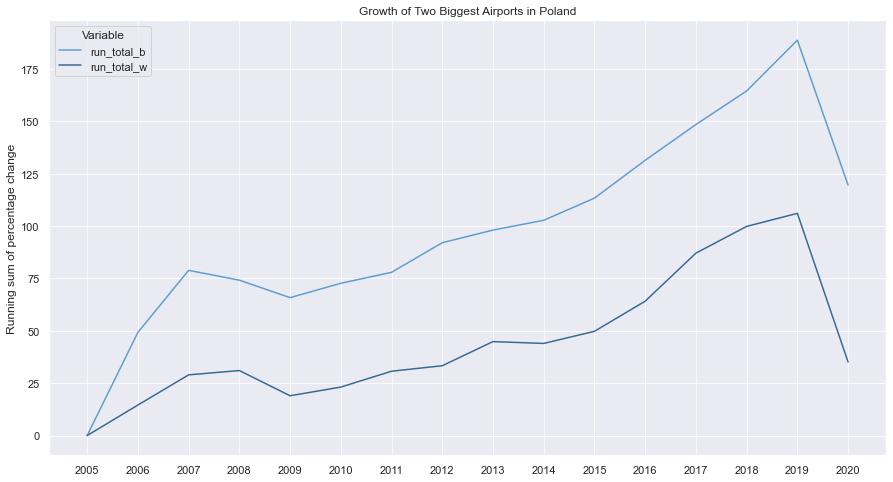

In [167]:
fig,ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='Year', y="Value", data=tidy2, hue='Variable',
                 palette="Blues_d", ax=ax)
ax.set(xlabel = '', ylabel = 'Running Sum of Percentage Change', title = "Growth of Two Biggest Airports in Poland")
ax.set_xticks(dfs["Year"])
ax.grid(True, alpha = 0.8)
plt.show

This chart indicates that even that Balice Airport is a smaller airport, it has grown relatively more than Warsaw Airport throughout this 15 years. Even the 2020 decrease in numbers of passengers ( due to the Covid pandemic ) was little bit smaller. 

Let's also calculate how many times has the number of passengers increased before the 2020 while the decrease started.

In [162]:
b_min = df_b['Passengers'].min()
b_max = df_b['Passengers'].max()
w_min = df_w['Passengers'].min()
w_max = df_w['Passengers'].max()
b_change = b_max / b_min
w_change = w_max / w_min

In [163]:
print('Balice Airport increased the number of passengers {:.2f} times'.format(b_change))
print('Warsaw Chopin Airport increased the number of passengers {:.2f} times'.format(w_change))

Balice Airport increased the number of passengers 5.30 times
Warsaw Chopin Airport increased the number of passengers 3.44 times


---
# 6. Conclusions

<br>
This visualization supposed to answer to the research questions which was: "How much both airports have grown over the years and which one is growing relatively faster?". Thanks to Wikipedia's data I can now say that it is <b>Balice Airport</b>. Even though it handles less passengers than Warsaw, then the overall and relative growth is much bigger. The line graph shows it very clearly. Even in the first year (2005 - 2006 ) we can observe that number of passengers increased almost 50% in Balice while only around 15% in Warsaw. There were only few years where Warsaw Airport noted a bigger increase year-to-year. 


In this notebook I have tried to incorporate Cairo's principles of truth, beauty, function and insights. I hope that I've provided a good data represenntation which gave a good insight and knowledge about the development of two main Poland's airports. The datasets were quite simple and I have tried to keep my visualizations as simple as possible, but in the same time pleasant for the eyes. I've decided to use Seaborn as I really enjoy its basic graphical output. I think that fonts, background and general layout make analyzing much more interesting. 